<strong><font color=darkblue size=6>HW13, Dec-06</font></strong>

1. **Kaggle public LB rank & score**: 16, 0.91680

1. **Kaggle team name**:DK-Team-Kryuchkova, Poletaev, Alekseev _ 
  1. Use format: `[ProGroup ID]-[Your fancy Kaggle group name]-[Team member names]`. 
  1. Eg. `DA-Dota-Lazareva,Iazykova,Ovyan` (see Rules in Kaggle for ProGroup ID)
1. Our Colab uses [CPU | GPU | TPU]

Your private LB score must be reproducible with this Colab. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation). Don't exceed runtime.

<hr color=darkblue>

# 🤔**Task 1: Theory (DSBA/ICEF only)**

## **Task 1.1**

Indicate whether the following statements are **True** or **False**. Justify your answers.

1. A training error of the 1-nearest neighbour (NN) model is always 0. *Hint*: See KNN in 📖
1. A test error of 1-NN model is never 0. *Hint*: See KNN in 📖
1. A decision tree generated with binary splitting has always $m + 1$ terminal nodes, where $m$ is the number of internal nodes.
1. Consider a data matrix $X_{n\times p}$ with an $i$-th observation as a row $X_{i\bullet}$. In $K$-fold cross-validation each $X_{i\bullet}$ belongs to exactly one test fold, $\mathcal X_1,...,\mathcal X_K$, so the test folds are independent sets
 . Then the error estimates of the separate folds are also independent. Equivalently, given that the unique test folds $\mathcal{X}_i$ and $\mathcal{X}_{j}$ are independent, the error estimates on test  folds $i$ and $j$, say $e_i$ and $e_j$, are also independent.

## **SOLUTION**

## № 1
1. TRUE

K = 1 => only one closest neighbour is considered. So model will works 

2. FALSE

Assume train test = test set. Then, model accuracy will be 100%.

3. TRUE
Assume that we have a decision tree generated with binary splitting and having length $h$. After each i-th splitting, there are $2^i$ nodes, so in general there are $$\sum_{i=0}^h 2^i$$ nodes, and only $2^h$ are terminal (those obtained after the last splitting). So, how many internal nodes are there?
$$\sum_{i = 0}^{h-1} = \frac{1(1-2^{h})}{1-2} = 2^{h} - 1$$
While there are $2^h$ terminal nodes. So, 𝑚+1  terminal nodes, where 𝑚 is the number of internal nodes.

4. FALSE

As the train data that our model was trained with partially coincides for each test fold, the error estimates will not be independent.

## **Task 1.2**

Given observations $\{z_i:=\left(x_i,y_i\right)\}_1^n$, consider a bootstrap
sample, $\mathcal Z$, generated from it.

1. Describe how a bootstrap sample is obtained and argue that the
probability that $z_1$ is not in the bootstrap sample is $\left(1 - \frac{1}{n}\right)^n$
1. Compute $\mathbb P [z_n\in\mathcal Z]$ for $n = 5$.
1. What is a potential use for the observations excluded from $\mathcal Z$?
1. Describe how to use bootstrap (and a suitable predictive ML model) to estimate $\mathbb{V}Y_1$, i.e. the variance of the random variable realized (only once) as $y_1$.

## **SOLUTION**

1. .
Assume we select at random $n$ observations. Probability that $Z_i$ is not in boootstrap is:
  $\displaystyle{\left({1}-\frac{1}{{n}}\right)}\cdot{\left({1}-\frac{1}{{n}}\right)}\cdot\ldots\cdot{\left({1}-\frac{1}{{n}}\right)}={\left({1}-\frac{1}{{n}}\right)}^{n}$ 
    
2. .

P(A) = 1 - P(not A) = $\displaystyle{P}{\left({z}_{{5}}\ \text{ is in the bootstrap sample}\right)}={1}-{\left({1}-\frac{1}{{5}}\right)}^{5}={1}-{0.32768}={0.67232}.$

3. .
Since observations are taken from the same population, then excluded observation can be used as usual.

4. .

The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples. Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This method helps to simulate data to estimate model's performance.

It is quite simple, as by using it we can calculate Variance by sample variance estimate of bootstrap's sample.

<hr color=darkblue>

# 🪐**Task 2: Kaggle-Venus vs Mars (for DSBA/ICEF/OOC)**

<details><summary><font color=darkblue>More info and Kaggle API instructions</font></summary>

**Private URL** for students (allows submission) is in Moodle's HW assignment. **Public URL** with read-only access is [here](https://www.kaggle.com/c/hse-ml-hw13-dec-6-venus-vs-mars/rules). See competition rules, submission, grading, dataset, and performance metric. The **starter code** below produces a baseline model, which you should beat, while respecting the competition rules. Your code starts after the timer. This is your baseline model. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation) for reproducibility!

**Instructions for enabling Kaggle API in Colab**:
1. Accept competition rules before running [Kaggle API](https://github.com/Kaggle/kaggle-api#api-credentials). [Loading Kaggle dataset example](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab)
1. In your Kaggle Account, [Create API Token](https://github.com/Kaggle/kaggle-api#api-credentials) and save the resulting **kaggle.json** file to the [root of your Google Drive](https://drive.google.com/drive/u/0/my-drive) 
2. In Colab, open **Files** panel 🗀 (on the left) and click gray folder icon <font color=gray>🖿</font> to mount your Google drive

Your Kaggle/Google Drive credentials are secure; and Colab's kaggle.json only lasts a Colab session.

</details>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip -q install --upgrade --force-reinstall --no-deps kaggle > log  # upgrade kaggle package (to avoid a warning)
!mkdir -p ~/.kaggle                                           # .kaggle folder must contain kaggle.json for kaggle executable to properly authenticate you to Kaggle.com
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log  # First, download kaggle.json from kaggle.com (in Account page) and place it in the root of mounted Google Drive
!cp kaggle.json ~/.kaggle/kaggle.json > log                   # Alternative location of kaggle.json (without a connection to Google Drive)
!chmod 600 ~/.kaggle/kaggle.json                              # give only the owner full read/write access to kaggle.json
!kaggle config set -n competition -v hse-ml-hw13-dec-6-venus-vs-mars  # set the competition context for the next few kaggle API calls. !kaggle config view - shows current settings
!kaggle competitions download >> log                          # download competition dataset as a zip file
!unzip -o *.zip >> log                                        # Kaggle dataset is copied as a single file and needs to be unzipped.
!kaggle competitions leaderboard --show                       # print public leaderboard

cp: cannot stat 'kaggle.json': No such file or directory
- competition is now set to: hse-ml-hw13-dec-6-venus-vs-mars
100% 35.0M/35.0M [00:00<00:00, 148MB/s]
Using competition: hse-ml-hw13-dec-6-venus-vs-mars
 teamId  teamName                                                                           submissionDate       score    
-------  ---------------------------------------------------------------------------------  -------------------  -------  
7881221  DE-GusiVPERED-Baminiwatte,Kurbatov                                                 2021-12-19 20:06:19  0.95200  
7875737  Lukianov Matvei                                                                    2021-12-19 20:06:07  0.95000  
7896293  KamillaZ                                                                           2021-12-18 13:59:01  0.94160  
7903108  [DO]-[Marsa]-[Alyakaev, Kukarkins, Tedesco]                                        2021-12-19 16:18:50  0.94080  
7885489  Oleg Malchenko                              

See [more](https://nvidia.custhelp.com/app/answers/detail/a_id/3751/~/useful-nvidia-smi-queries) about NVIDIA GPU stats. Test your code in (free) Colab. It uses Tesla K80 GPU.

In [3]:
!nvidia-smi --query-gpu=gpu_name,memory.total,memory.free,memory.used --format=csv

name, memory.total [MiB], memory.free [MiB], memory.used [MiB]
Tesla K80, 11441 MiB, 11441 MiB, 0 MiB


In [4]:
%%time
%%capture
%reset -f
!pip -q install -U tensorflow_addons plotly > log   # update tfa in case students need to use it
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all" 
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'  # causes an error   https://github.com/tensorflow/tensorflow/issues/38197
import tensorflow_addons as tfa, tensorflow as tf, tensorflow.keras as keras, tensorflow_datasets as tfds
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Conv2D, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.applications import resnet50, xception, mobilenet, mobilenet_v2, mobilenet_v3
from tensorflow.keras.utils import image_dataset_from_directory as idfd
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv', index_label='id') # rounds values to 2 decimals

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60*5): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

np.set_printoptions(linewidth=100, precision=2, edgeitems=5, suppress=True)
pd.set_option('max_columns', 20, 'precision', 2, 'display.max_rows', 4)
tDIR, sDIR = 'train/', 'test/'

CPU times: user 3.54 s, sys: 513 ms, total: 4.06 s
Wall time: 57 s


Examples of images from female class

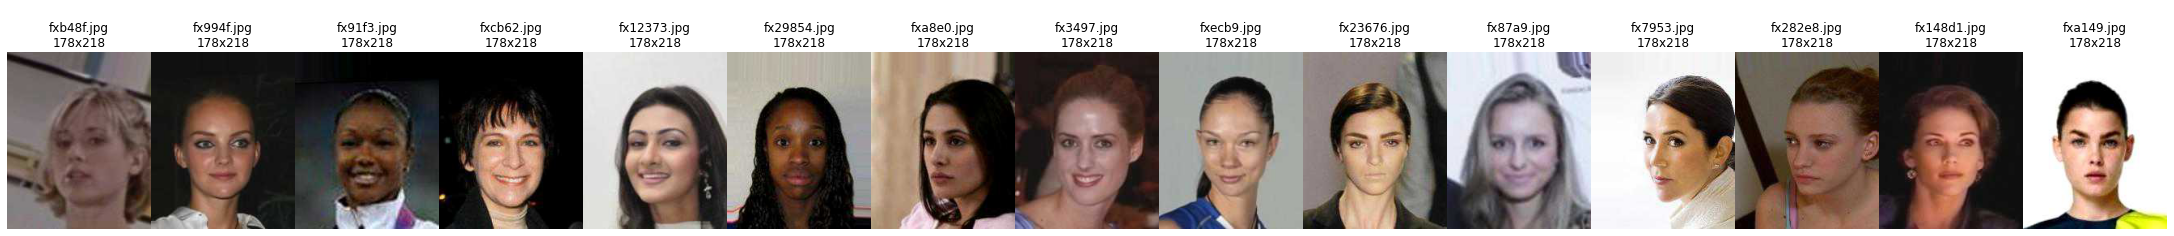

In [5]:
n, fig = 15, plt.figure(figsize=(30,10));
for i, f in enumerate(np.random.RandomState(0).choice(os.listdir(tDIR+'female/'), n)):
  ax = plt.subplot(1, n, i + 1)
  img = keras.preprocessing.image.load_img(tDIR+'female/'+f);
  _ = ax.set_title(f'\n{f}\n{img.size[0]}x{img.size[1]}');
  _ = plt.axis('off');   _ = plt.tight_layout(pad=0);   _ = plt.imshow(img);

Examples of images from male class

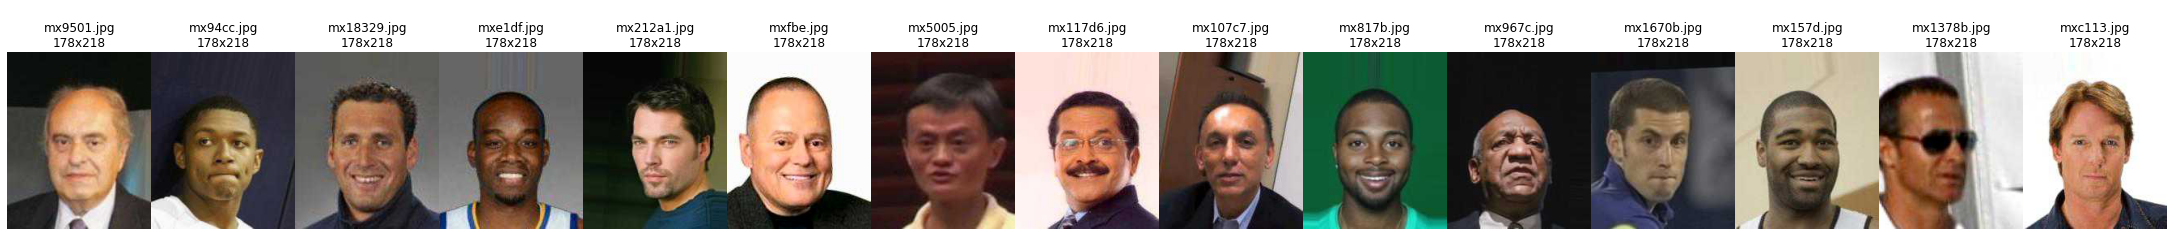

In [6]:
n, fig = 15, plt.figure(figsize=(30,10));
for i, f in enumerate(np.random.RandomState(0).choice(os.listdir(tDIR+'male/'), n)):
  ax = plt.subplot(1, n, i + 1)
  img = keras.preprocessing.image.load_img(tDIR+'male/'+f);
  _ = ax.set_title(f'\n{f}\n{img.size[0]}x{img.size[1]}');
  _ = plt.axis('off');   _ = plt.tight_layout(pad=0);   _ = plt.imshow(img);

In [23]:
tmr = Timer() # runtime limit (in seconds). Add all of your code after the timer

⏳ started. You have 300 sec. Good luck!


<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer - All Start Here...</font></strong>


## **Task 2.1**

**Explain your preprocessing:** i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.

## **Task 2.2**

**Explain your modeling approach:** ideas you tried and why you thought they would be helpful. Takeaway: how these decisions guided you in modeling.

The following cell loads train/validation/test sets as [TF datasets](https://www.tensorflow.org/datasets), `tDS`, `vDS` and `sDS`, respectively.

In [24]:
BS, image_size = 32, (224, 224)  # batch size; image dimensions required by pretrained model
tDS = idfd( tDIR, labels='inferred', label_mode='binary', subset='training', validation_split=0.2,
           class_names=None, color_mode='rgb', batch_size=BS, image_size=image_size, shuffle=True, seed=0).prefetch(buffer_size=tf.data.AUTOTUNE)  # training dataset
vDS = idfd( tDIR, labels='inferred', label_mode='binary', subset='validation', validation_split=0.2,
           class_names=None, color_mode='rgb', batch_size=BS, image_size=image_size, shuffle=True, seed=0).prefetch(buffer_size=tf.data.AUTOTUNE)  # validation dataset
sDS = idfd( sDIR, labels=None, label_mode='binary', subset=None, validation_split=None,
           class_names=None, color_mode='rgb', batch_size=BS, image_size=image_size, shuffle=False, seed=0)           # don't prefetch this testing dataset
print(tf.reduce_sum([tf.reduce_sum(f) for f in list(tDS.take(1))[0][0][:10]])) # to validate seeding of file sampling

Found 5000 files belonging to 2 classes.
Using 4000 files for training.
Found 5000 files belonging to 2 classes.
Using 1000 files for validation.
Found 5000 files belonging to 1 classes.
tf.Tensor(147468820.0, shape=(), dtype=float32)


This is your baseline DNN model. Remember to [seed all your experiments](https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development) for reproducibility. [Status of GPU-Determinism in TF](https://github.com/NVIDIA/framework-determinism/blob/master/tensorflow_status.md). 

Below we replace the top layer of the pretrained CNN ([MobileNetV2](https://openaccess.thecvf.com/content_cvpr_2018/papers/Sandler_MobileNetV2_Inverted_Residuals_CVPR_2018_paper.pdf)) and train the new layer only (all remaining pretrained layers are frozen).

In [25]:
%%time
tf.random.set_seed(0)   # always seed your experiments
Init = keras.initializers.RandomNormal(seed=0) # seed all that you can

pm = tf.keras.applications.InceptionV3(weights="imagenet", include_top=False)         # pretrained Xception model
avg = GlobalAveragePooling2D(data_format='channels_last')(pm.output)  # collapse spatial dimensions
output = Dense(1, activation="sigmoid", kernel_initializer=Init)(avg)
pm1 = keras.Model(inputs=pm.input, outputs=output)
for l in pm.layers: l.trainable = False                               # freeze layers from training

opt = keras.optimizers.Adam(learning_rate=0.01)
pm1.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
hist = pm1.fit(tDS, epochs=2, validation_data=vDS)     # For BS=32, 2xCPU: 15min/epoch, GPU: 15sec/epoch  (60x faster)

Epoch 1/2
125/125 [==============================] - 35s 233ms/step - loss: 7.6406 - accuracy: 0.5878 - val_loss: 2.5445 - val_accuracy: 0.6380
Epoch 2/2
125/125 [==============================] - 28s 218ms/step - loss: 3.9604 - accuracy: 0.6245 - val_loss: 2.3252 - val_accuracy: 0.6730
CPU times: user 44.9 s, sys: 4.13 s, total: 49.1 s
Wall time: 1min 5s


Below we post-train all pre-trained layers after unlocking them.

In [26]:
%%time
for l in pm.layers: l.trainable = True      # allow training
pm1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=['binary_accuracy'])
hist = pm1.fit(tDS, epochs=2, validation_data=vDS)

Epoch 1/2
125/125 [==============================] - 89s 636ms/step - loss: 0.3178 - binary_accuracy: 0.8702 - val_loss: 0.3384 - val_binary_accuracy: 0.8720
Epoch 2/2
125/125 [==============================] - 78s 623ms/step - loss: 0.1399 - binary_accuracy: 0.9467 - val_loss: 0.2592 - val_binary_accuracy: 0.9000
CPU times: user 2min 22s, sys: 4.35 s, total: 2min 27s
Wall time: 2min 50s


Compile and export predictions:

In [27]:
vIDs = [f.split('/')[1].split('.')[0] for f in sDS.file_paths]   # parse image IDs from file names
pY = pd.DataFrame(pm1.predict(sDS), index=vIDs, columns=['y'])   # predicted targets
ToCSV((pY>0.5)*1, '🪐-baseline')

<font size=5>⏳</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>


In [28]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

Runtime is 266 sec


## 💡**Starter Ideas**

1. Try tuning CNN hyperparameters and architecture
1. Other [pre-trained models](https://www.tensorflow.org/api_docs/python/tf/keras/applications) can be faster or more accurate for the given dataset and/or hardware ([benchmarks](https://datascience.stackexchange.com/a/39211/14094))
1. Transforming images via [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)could be faster
1. Identify poorly predicted train images (with near-boundary confidence) and add their augmented versions
1. Identify poorly predicted test images (with near-boundary confidence) and post-train CNN even more on "similar" train images. Similarity can be done in terms of some of the layer(s) of CNN
1. Do you really need all given images? CNN will train faster on a "meaningful" subsample
1. Try ensembling different pretrained CNNs or only their selected layers
1. Try different learning rate for different layers of pretrained models
1. Try cropping instead of resizing images to the fixed $224\times224$ (faces look more naturally if aspect ratio is respected)
1. Try [TPU](https://en.wikipedia.org/wiki/Tensor_Processing_Unit) in Colab. 😮 See [doc example](https://www.tensorflow.org/guide/tpu). Local images should be loaded with [Python I/O](https://stackoverflow.com/a/63147614/3043335), not TF datasets.